c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Model: "Basic_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Image (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_128 (Dense)             │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_64 (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent_Space (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_64 (Dense)              │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_128 (Dense)             │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reconstructed_Image (Dense)     │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0651 - val_loss: 0.0386
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0327 - val_loss: 0.0278
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0254 - val_loss: 0.0225
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0215 - val_loss: 0.0199
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0196 - val_loss: 0.0183
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0181 - val_loss: 0.0171
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0170 - val_loss: 0.0160
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0161 - val_loss: 0.0154
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0149 - val_loss: 0.0142


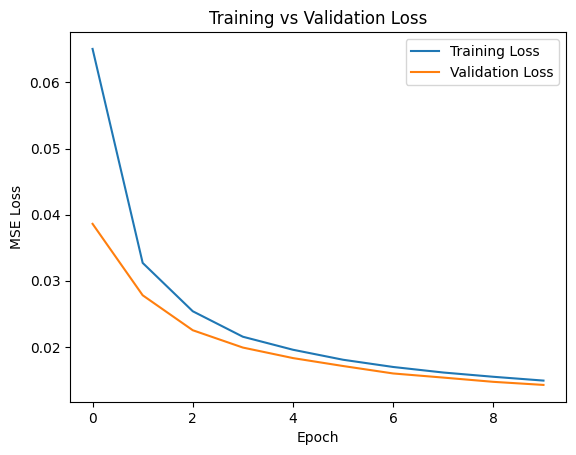

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


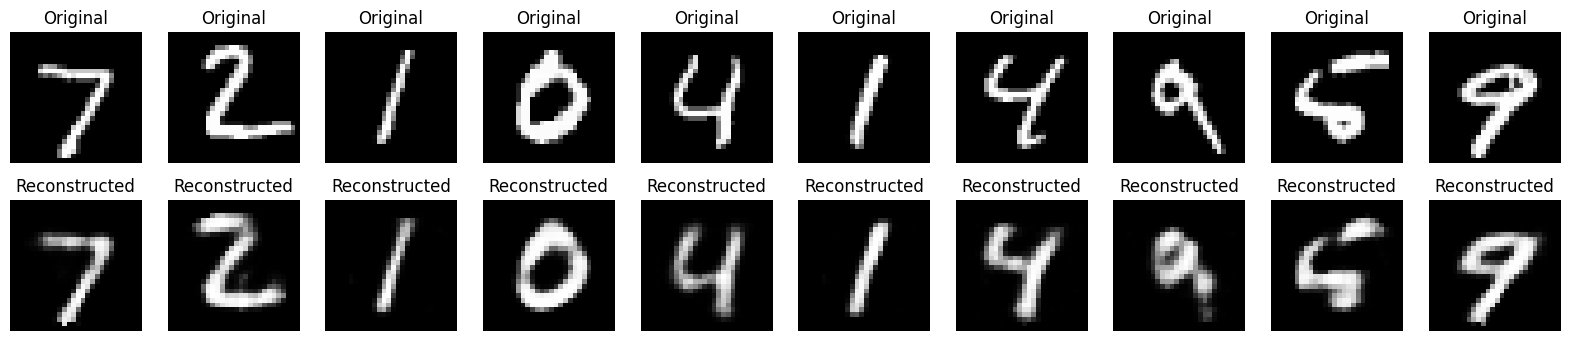

In [1]:
# ==============================
# Autoencoder on MNIST Dataset
# ==============================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# ------------------------------
# 1. Load and Preprocess Data
# ------------------------------
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

# ------------------------------
# 2. Model Design
# ------------------------------
input_img = Input(shape=(784,), name="Input_Image")

# Encoder
encoded = Dense(128, activation='relu', name="Encoder_128")(input_img)
encoded = Dense(64, activation='relu', name="Encoder_64")(encoded)
latent = Dense(32, activation='relu', name="Latent_Space")(encoded)

# Decoder
decoded = Dense(64, activation='relu', name="Decoder_64")(latent)
decoded = Dense(128, activation='relu', name="Decoder_128")(decoded)
output_img = Dense(784, activation='sigmoid', name="Reconstructed_Image")(decoded)

# Autoencoder model
autoencoder = Model(input_img, output_img, name="Basic_Autoencoder")

# ------------------------------
# 3. Compile Model
# ------------------------------
autoencoder.compile(optimizer='adam', loss='mse')

# ------------------------------
# 4. Model Summary
# ------------------------------
autoencoder.summary()

# ------------------------------
# 5. Train Model
# ------------------------------
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# ------------------------------
# 6. Plot Training vs Validation Loss
# ------------------------------
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# ------------------------------
# 7. Original vs Reconstructed Images
# ------------------------------
n = 10
test_images = x_test[:n]
reconstructed_images = autoencoder.predict(test_images)

plt.figure(figsize=(20,4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
